In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
from pandasql import sqldf

In [2]:
lgb.__version__

'2.2.1'

In [3]:
train_metadata = pd.read_csv('training_set_metadata.csv')
test_metadata = pd.read_csv('test_set_metadata.csv')

In [4]:
agg_train = pd.read_csv('agg_train.csv')
agg_test = pd.read_csv('agg_test_merged.csv')

In [5]:
train_metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [6]:
agg_train.head()

,object_id,count_flux_err,min_flux_err,max_flux_err,std_flux_err,sum_flux_err,mean_flux_err,median_flux_err,count_flux,min_flux,max_flux,std_flux,sum_flux,mean_flux,median_flux,count_detected,std_detected,sum_detected,mean_detected,median_detected
0,615,352,2.130510,12.845472,1.744747,1577.92540,4.482743,3.835268,352,-1100.440100,660.626340,394.109860,-43330.14500,-123.097000,-89.477520,352,0.226295,333.0,0.946023,1.0
1,713,350,0.639458,9.115748,1.509888,825.86700,2.359620,1.998217,350,-14.735178,14.770886,6.471144,-498.17276,-1.423351,-0.873032,350,0.377423,60.0,0.171429,0.0
2,730,330,0.695106,11.281384,1.721134,815.45026,2.471062,1.990850,330,-19.159811,47.310060,8.022239,748.25323,2.267434,0.409172,330,0.255022,23.0,0.069697,0.0
3,745,351,0.567170,55.892746,3.537324,897.00700,2.555576,1.819875,351,-15.494463,220.795210,27.558208,3127.13130,8.909205,1.035895,351,0.379469,61.0,0.173789,0.0
4,1124,352,0.695277,11.383690,1.933838,969.05730,2.753004,2.214853,352,-16.543753,143.600190,20.051722,2515.28700,7.145702,1.141288,352,0.379041,61.0,0.173295,0.0


In [10]:
for i in agg_train.columns:
    print("B.{},".format(i))

B.object_id,
B.count_flux_err,
B.min_flux_err,
B.max_flux_err,
B.std_flux_err,
B.sum_flux_err,
B.mean_flux_err,
B.median_flux_err,
B.count_flux,
B.min_flux,
B.max_flux,
B.std_flux,
B.sum_flux,
B.mean_flux,
B.median_flux,
B.count_detected,
B.std_detected,
B.sum_detected,
B.mean_detected,
B.median_detected,


In [12]:
merged_train_metadata = sqldf("SELECT A.*,B.count_flux_err,B.min_flux_err,B.max_flux_err,B.std_flux_err,B.sum_flux_err,B.mean_flux_err,B.median_flux_err,\
B.count_flux,B.min_flux,B.max_flux,B.std_flux,B.sum_flux,B.mean_flux,B.median_flux,B.count_detected,\
B.std_detected,B.sum_detected,B.mean_detected,B.median_detected FROM train_metadata A LEFT JOIN agg_train B WHERE A.object_id = B.object_id")

In [13]:
merged_train_metadata.shape

(7848, 31)

In [20]:
merged_train_metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,...,max_flux,std_flux,sum_flux,mean_flux,median_flux,count_detected,std_detected,sum_detected,mean_detected,median_detected
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,...,660.626340,394.109860,-43330.14500,-123.097000,-89.477520,352,0.226295,333.0,0.946023,1.0
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,...,14.770886,6.471144,-498.17276,-1.423351,-0.873032,350,0.377423,60.0,0.171429,0.0
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,...,47.310060,8.022239,748.25323,2.267434,0.409172,330,0.255022,23.0,0.069697,0.0
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,...,220.795210,27.558208,3127.13130,8.909205,1.035895,351,0.379469,61.0,0.173789,0.0
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,...,143.600190,20.051722,2515.28700,7.145702,1.141288,352,0.379041,61.0,0.173295,0.0


In [15]:
%%time
merged_test_metadata = sqldf("SELECT A.*,B.count_flux_err,B.min_flux_err,B.max_flux_err,B.std_flux_err,B.sum_flux_err,B.mean_flux_err,B.median_flux_err,\
B.count_flux,B.min_flux,B.max_flux,B.std_flux,B.sum_flux,B.mean_flux,B.median_flux,B.count_detected,\
B.std_detected,B.sum_detected,B.mean_detected,B.median_detected FROM test_metadata A LEFT JOIN agg_test B WHERE A.object_id = B.object_id")

CPU times: user 2min 17s, sys: 4.65 s, total: 2min 21s
Wall time: 2min 21s


In [16]:
merged_test_metadata.shape

(3492890, 30)

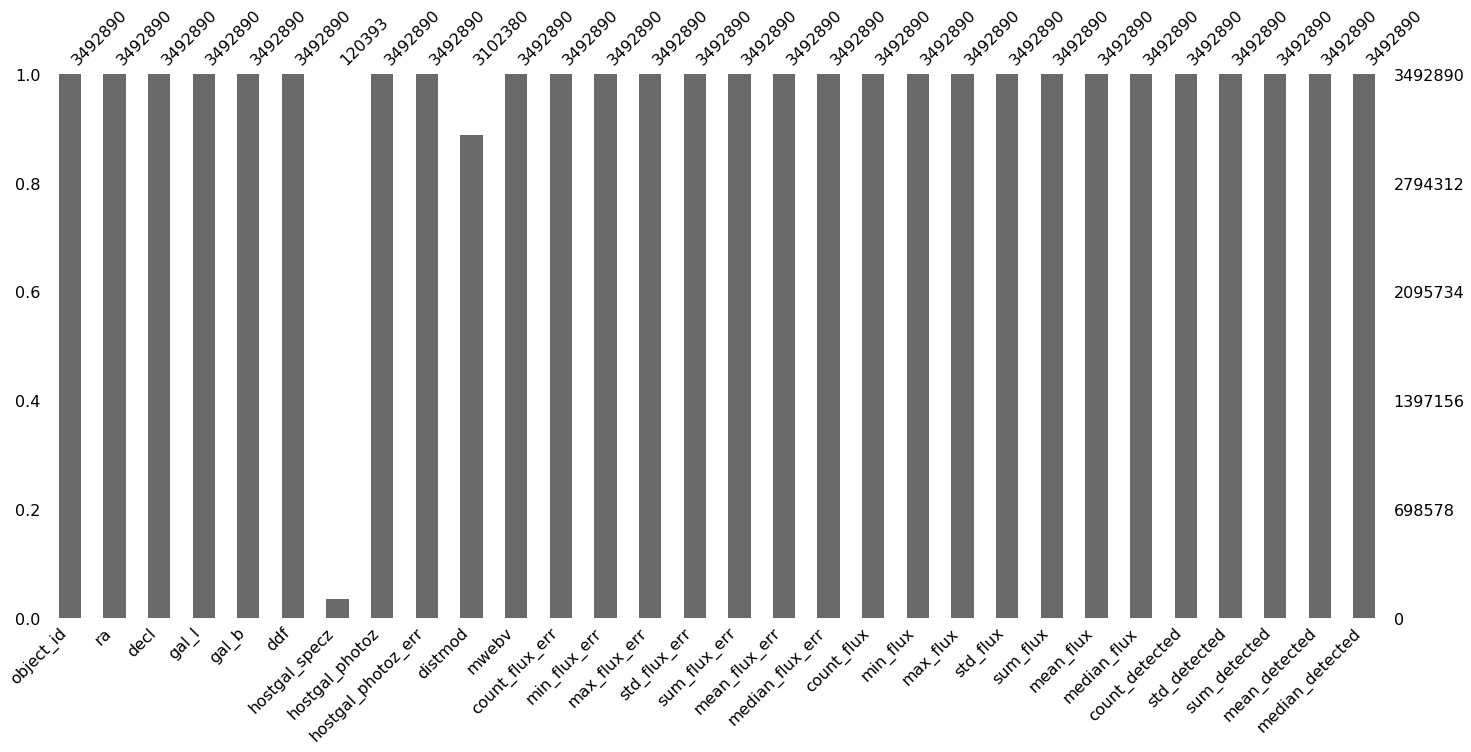

In [17]:
msno.bar(merged_test_metadata)

In [21]:
%%time
merged_train_metadata.to_csv('merged_train_metadata.csv',index=False)
merged_test_metadata.to_csv('merged_test_metadata.csv',index=False)

CPU times: user 1min 43s, sys: 1.08 s, total: 1min 44s
Wall time: 1min 45s
